# This Notebook is for Capstone Project from Coursera IBM Data Science Professional Certificate Course

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
print('Libraries imported.')

Libraries imported.


### City of Calgary dataset imported from City of Calgary Website

In [3]:
#Read csv file into Panda Dataframe
df = pd.read_csv('calgary_data.csv')

In [7]:
df.shape

(303, 18)

### Data Cleaning 

In [8]:
x = (df['NAME'].str.startswith('0')) | (df['NAME'].str.startswith('1'))

In [9]:
df['TEMPORARY'] = x

In [10]:
df.shape

(303, 19)

In [11]:
indexNames = df[(df['TEMPORARY'] == True)].index
df.drop(indexNames, inplace = True)

df = df.reset_index(drop=True)

df.shape

(255, 19)

In [12]:
df.head(15)

,CLASS,CLASS_CODE,NAME,SECTOR,RES_CNT,DWELL_CNT,OWNSHP_CNT,SING_FAMLY,DUPLEX,MULTI_PLEX,APARTMENT,TOWN_HOUSE,MALE_CNT,FEMALE_CNT,MF_20_24,MF_25_34,MF_35_44,MF_45_54,TEMPORARY
0,Residential,1,ABBEYDALE,NORTHEAST,5957,2069,1356,1418,290,0,0,230,3056,2895,333,835,1004,792,False
1,Residential,1,ACADIA,SOUTH,10520,5046,2577,2282,132,1,2026,384,5310,5171,509,1659,1706,1339,False
2,Residential,1,ALBERT PARK/RADISSON HEIGHTS,EAST,6997,3010,819,909,474,27,794,346,3627,3360,418,1434,1220,885,False
3,Residential,1,ALTADORE,CENTRE,6942,3285,1928,1367,633,27,625,462,3394,3535,321,1158,1386,1085,False
4,Industrial,2,ALYTH/BONNYBROOK,CENTRE,0,11,0,9,0,0,0,0,0,0,0,0,0,0,False
5,Residential,1,APPLEWOOD PARK,EAST,6981,2415,1298,1371,20,1,804,132,3540,3419,545,893,1152,991,False
6,Residential,1,ARBOUR LAKE,NORTHWEST,10619,3937,3193,2682,174,0,683,61,5168,5422,715,1012,1288,1748,False
7,Residential,1,ASPEN WOODS,WEST,9446,3068,2455,2202,13,1,341,507,4650,4767,388,965,1875,1644,False
8,Residential,1,AUBURN BAY,SOUTHEAST,17607,6046,4342,3790,611,1,887,743,8722,8831,593,3232,4109,1905,False
9,Industrial,2,AURORA BUSINESS PARK,NORTH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False


In [13]:
df.shape

(255, 19)

In [14]:
df.drop('TEMPORARY', axis = 1, inplace =True)

In [15]:
df.head()

,CLASS,CLASS_CODE,NAME,SECTOR,RES_CNT,DWELL_CNT,OWNSHP_CNT,SING_FAMLY,DUPLEX,MULTI_PLEX,APARTMENT,TOWN_HOUSE,MALE_CNT,FEMALE_CNT,MF_20_24,MF_25_34,MF_35_44,MF_45_54
0,Residential,1,ABBEYDALE,NORTHEAST,5957,2069,1356,1418,290,0,0,230,3056,2895,333,835,1004,792
1,Residential,1,ACADIA,SOUTH,10520,5046,2577,2282,132,1,2026,384,5310,5171,509,1659,1706,1339
2,Residential,1,ALBERT PARK/RADISSON HEIGHTS,EAST,6997,3010,819,909,474,27,794,346,3627,3360,418,1434,1220,885
3,Residential,1,ALTADORE,CENTRE,6942,3285,1928,1367,633,27,625,462,3394,3535,321,1158,1386,1085
4,Industrial,2,ALYTH/BONNYBROOK,CENTRE,0,11,0,9,0,0,0,0,0,0,0,0,0,0


### Calculate possible client base for each neighborhood based on demographic data by City of Calgary.

from city of calgary dataset, we have population for each age group in male/female category.  Lets create columns for
total clients for each neighborhood by combining number for age 20-54, and adding male/female columns.

In [16]:
sum_col = df['MF_20_24']+df['MF_25_34']+df['MF_35_44']+df['MF_45_54']
df['CLIENTS'] = sum_col

In [17]:
df.head()

,CLASS,CLASS_CODE,NAME,SECTOR,RES_CNT,DWELL_CNT,OWNSHP_CNT,SING_FAMLY,DUPLEX,MULTI_PLEX,APARTMENT,TOWN_HOUSE,MALE_CNT,FEMALE_CNT,MF_20_24,MF_25_34,MF_35_44,MF_45_54,CLIENTS
0,Residential,1,ABBEYDALE,NORTHEAST,5957,2069,1356,1418,290,0,0,230,3056,2895,333,835,1004,792,2964
1,Residential,1,ACADIA,SOUTH,10520,5046,2577,2282,132,1,2026,384,5310,5171,509,1659,1706,1339,5213
2,Residential,1,ALBERT PARK/RADISSON HEIGHTS,EAST,6997,3010,819,909,474,27,794,346,3627,3360,418,1434,1220,885,3957
3,Residential,1,ALTADORE,CENTRE,6942,3285,1928,1367,633,27,625,462,3394,3535,321,1158,1386,1085,3950
4,Industrial,2,ALYTH/BONNYBROOK,CENTRE,0,11,0,9,0,0,0,0,0,0,0,0,0,0,0


In [18]:
df.drop(['MF_20_24','MF_25_34','MF_35_44','MF_45_54'], axis=1, inplace=True)

In [1]:
df.head()

NameError: name 'df' is not defined

### Add latutude and longitude values to each neighbourhood in Calgary, using Geopy library, Nominatim function.

In [20]:
#create a function to find latitide.longitude for each neighborhood of calgary
def latlng(neighborhood):
    
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(neighborhood +','+'Calgary')
    latitude = location.latitude
    longitude = location.longitude
    return latitude, longitude


In [154]:
#Popultae dataframe with lat long values for each neighborhood
neighborhoods = [name for name in df['NAME']]
x=[]
y=[]
for neighborhood in neighborhoods:
    try:
        lat, lng = latlng(neighborhood)
        x.append(lat)
        y.append(lng)
    except:
        print('values not available for {}'.format(neighborhood))
df['Latitude']=x
df['Longitude']=y

    
df.head()

,CLASS,CLASS_CODE,NAME,SECTOR,RES_CNT,DWELL_CNT,OWNSHP_CNT,SING_FAMLY,DUPLEX,MULTI_PLEX,APARTMENT,TOWN_HOUSE,MALE_CNT,FEMALE_CNT,CLIENTS,Latitude,Longitude
0,Residential,1,ABBEYDALE,NORTHEAST,5957,2069,1356,1418,290,0,0,230,3056,2895,2964,51.058836,-113.929413
1,Residential,1,ACADIA,SOUTH,10520,5046,2577,2282,132,1,2026,384,5310,5171,5213,50.968655,-114.055587
2,Residential,1,ALBERT PARK/RADISSON HEIGHTS,EAST,6997,3010,819,909,474,27,794,346,3627,3360,3957,51.044845,-113.990195
3,Residential,1,ALTADORE,CENTRE,6942,3285,1928,1367,633,27,625,462,3394,3535,3950,51.015104,-114.100756
4,Industrial,2,ALYTH/BONNYBROOK,CENTRE,0,11,0,9,0,0,0,0,0,0,0,51.016669,-114.024294


Save file to csv as it was taking lond each time to get lat/long values

In [216]:
df.to_csv('calgary_data1.csv', index=False)

### Read updated city of calgary data into panda dataframe

In [4]:
df_calgary = pd.read_csv('calgary_data1.csv')
df_calgary.head()
                        

,CLASS,CLASS_CODE,NAME,SECTOR,RES_CNT,DWELL_CNT,OWNSHP_CNT,SING_FAMLY,DUPLEX,MULTI_PLEX,APARTMENT,TOWN_HOUSE,MALE_CNT,FEMALE_CNT,CLIENTS,Latitude,Longitude
0,Residential,1,ABBEYDALE,NORTHEAST,5957,2069,1356,1418,290,0,0,230,3056,2895,2964,51.058836,-113.929413
1,Residential,1,ACADIA,SOUTH,10520,5046,2577,2282,132,1,2026,384,5310,5171,5213,50.968655,-114.055587
2,Residential,1,ALBERT PARK/RADISSON HEIGHTS,EAST,6997,3010,819,909,474,27,794,346,3627,3360,3957,51.044845,-113.990195
3,Residential,1,ALTADORE,CENTRE,6942,3285,1928,1367,633,27,625,462,3394,3535,3950,51.015104,-114.100756
4,Industrial,2,ALYTH/BONNYBROOK,CENTRE,0,11,0,9,0,0,0,0,0,0,0,51.016669,-114.024294


In [329]:
df_calgary.rename(columns = {'NAME' : 'Neighborhood'}, inplace=True)
df_calgary.head()

,CLASS,CLASS_CODE,Neighborhood,SECTOR,RES_CNT,DWELL_CNT,OWNSHP_CNT,SING_FAMLY,DUPLEX,MULTI_PLEX,APARTMENT,TOWN_HOUSE,MALE_CNT,FEMALE_CNT,CLIENTS,Latitude,Longitude
0,Residential,1,ABBEYDALE,NORTHEAST,5957,2069,1356,1418,290,0,0,230,3056,2895,2964,51.058836,-113.929413
1,Residential,1,ACADIA,SOUTH,10520,5046,2577,2282,132,1,2026,384,5310,5171,5213,50.968655,-114.055587
2,Residential,1,ALBERT PARK/RADISSON HEIGHTS,EAST,6997,3010,819,909,474,27,794,346,3627,3360,3957,51.044845,-113.990195
3,Residential,1,ALTADORE,CENTRE,6942,3285,1928,1367,633,27,625,462,3394,3535,3950,51.015104,-114.100756
4,Industrial,2,ALYTH/BONNYBROOK,CENTRE,0,11,0,9,0,0,0,0,0,0,0,51.016669,-114.024294


In [330]:
Calgary_population_2019 = sum(df_calgary['RES_CNT'])

### Lets get Calgary Latitide and Longitude

In [331]:
address = 'calgary, alberta'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('{} coordinates are {} and {}'.format(address,latitude, longitude))


calgary, alberta coordinates are 51.0534234 and -114.0625892


### Lets create map of Calgary with all its neighborhoods

In [332]:
# create map of calgary using latitude and longitude values
map_calgary = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(df_calgary['Latitude'], df_calgary['Longitude'], df_calgary['Neighborhood'],):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_calgary)  
    

    
map_calgary

### Lets search for venues in each neighborhood of Calgary by using Foursquare API call to Explore each neighbourhood.

In [334]:
#a function to near by venues of each neighborgood of calgary
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [335]:
calgary_venues = getNearbyVenues(names=df_calgary['Neighborhood'],
                                   latitudes=df_calgary['Latitude'],
                                   longitudes=df_calgary['Longitude']
                                  )

In [336]:
calgary_venues.head()
calgary_venues.shape

(1365, 7)

In [337]:
print('There are {} uniques categories.'.format(len(calgary_venues['Venue Category'].unique())))

There are 224 uniques categories.


In [338]:
calgary_venues.to_csv("calgary_venues.csv", index=False)

In [339]:
calgary_venues = pd.read_csv("calgary_venues.csv")

In [340]:
calgary_venues.shape

(1365, 7)

In [341]:
calgary_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ABBEYDALE,51.058836,-113.929413,Subway,51.059239,-113.934423,Sandwich Place
1,ABBEYDALE,51.058836,-113.929413,Mac's,51.059376,-113.934425,Convenience Store
2,ABBEYDALE,51.058836,-113.929413,Circle K,51.059376,-113.934425,Convenience Store
3,ABBEYDALE,51.058836,-113.929413,roadside pub,51.059277,-113.934529,Wings Joint
4,ACADIA,50.968655,-114.055587,Highwest Electric Ltd,50.965847,-114.057257,Construction & Landscaping


### Get the each venues category as columns in dataframe using onehot encoding method.

In [342]:

calgary_onehot = pd.get_dummies(calgary_venues[['Venue Category']], prefix="", prefix_sep=" ")

# add neighborhood column back to dataframe
calgary_onehot['Neighborhood'] = calgary_venues['Neighborhood'] 

#move neighborhood column to the first column
cols = list(calgary_onehot.columns)
cols = [cols[-1]]+cols[:-1]
calgary_onehot = calgary_onehot[cols]

calgary_onehot.head()


,Neighborhood,ATM,Airport,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Candy Store,Carpet Store,Casino,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Classroom,College Library,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Eastern European Restaurant,Electronics Store,Elementary School,Event Service,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flea Market,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Inn,Island,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Other Great Outdoors,Other Repair Shop,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Post Office,Print Shop,Professional & Other Places,Pub,Ramen Restaurant,Real Estate Office,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Rest Area,Restaurant,River,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Ski Area,Ski Lodge,Ski Trail,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toy / Game Store,Trade School,Trail,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,ABBEYDALE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ABBEYDALE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [343]:
calgary_grouped = calgary_onehot.groupby('Neighborhood').mean().reset_index()
calgary_grouped.head()

,Neighborhood,ATM,Airport,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Candy Store,Carpet Store,Casino,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Classroom,College Library,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Eastern European Restaurant,Electronics Store,Elementary School,Event Service,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flea Market,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Inn,Island,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Other Great Outdoors,Other Repair Shop,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Post Office,Print Shop,Professional & Other Places,Pub,Ramen Restaurant,Real Estate Office,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Rest Area,Restaurant,River,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Ski Area,Ski Lodge,Ski Trail,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toy / Game Store,Trade School,Trail,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,ABBEYDALE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.50,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0

### Get top 10 venue category for each neighbourhood in Calgary

In [344]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [345]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = calgary_grouped['Neighborhood']

for ind in np.arange(calgary_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(calgary_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ABBEYDALE,Convenience Store,Wings Joint,Sandwich Place,Flea Market,Gastropub,Gas Station,Garden Center,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint
1,ACADIA,Construction & Landscaping,Athletics & Sports,Yoga Studio,Food & Drink Shop,German Restaurant,Gastropub,Gas Station,Garden Center,Furniture / Home Store,Frozen Yogurt Shop
2,ALBERT PARK/RADISSON HEIGHTS,Train Station,Asian Restaurant,Cosmetics Shop,Convenience Store,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Yoga Studio
3,ALTADORE,Dog Run,Greek Restaurant,Coffee Shop,Massage Studio,Yoga Studio,Food & Drink Shop,Gastropub,Gas Station,Garden Center,Furniture / Home Store
4,ALYTH/BONNYBROOK,Gas Station,Café,Restaurant,Yoga Studio,Flea Market,Garden Center,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant


In [346]:
neighborhoods_venues_sorted.shape

(217, 11)

### Lets apply Kmeans Clustering machine learning technique

In [347]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()



In [348]:
# set number of clusters
from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []
max_range = 20
calgary_grouped_clustering = calgary_grouped.drop('Neighborhood', 1)

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = calgary_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)
    




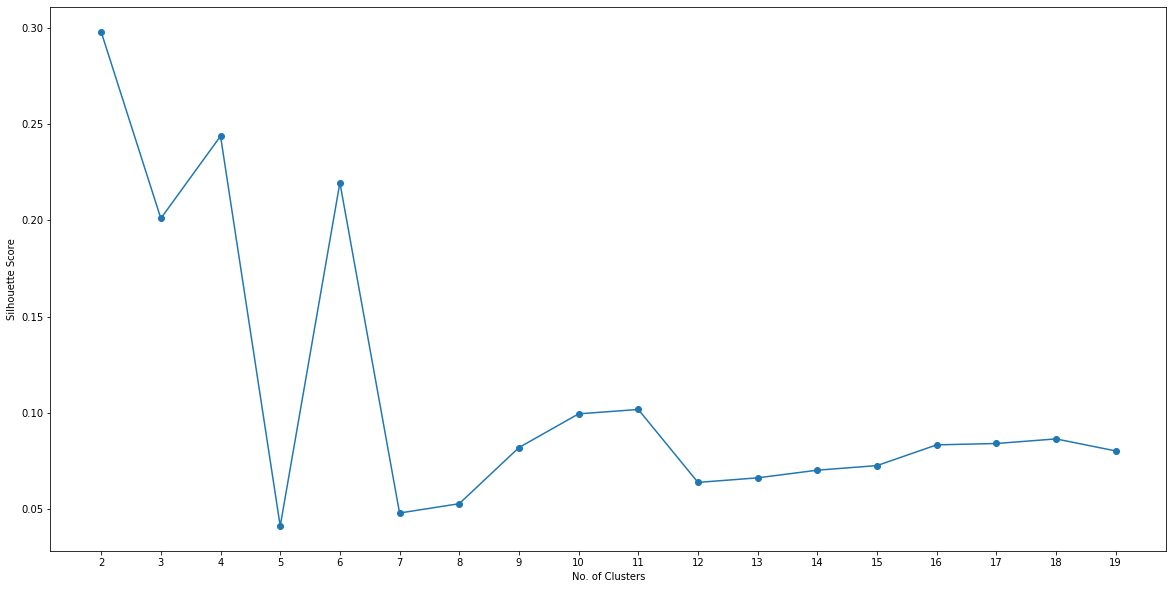

In [349]:
plot(max_range, scores, 'No. of Clusters', 'Silhouette Score')

Based on graph, we see that optimal number of clusters to apply KMeans is 2, now lets run KMeans 

In [361]:
kmeans = KMeans(n_clusters = 4, random_state = 0).fit(kmc)
kmeans.labels_[0:10]

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2], dtype=int32)

In [362]:
# add clustering labels
neighborhoods_venues_sorted.drop("Cluster Labels", axis =1, inplace=True)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

calgary_merged = df_calgary

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
calgary_merged = calgary_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

calgary_merged.head(40) # check the last columns!

,CLASS,CLASS_CODE,Neighborhood,SECTOR,RES_CNT,DWELL_CNT,OWNSHP_CNT,SING_FAMLY,DUPLEX,MULTI_PLEX,APARTMENT,TOWN_HOUSE,MALE_CNT,FEMALE_CNT,CLIENTS,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Residential,1,ABBEYDALE,NORTHEAST,5957,2069,1356,1418,290,0,0,230,3056,2895,2964,51.058836,-113.929413,2.0,Convenience Store,Wings Joint,Sandwich Place,Flea Market,Gastropub,Gas Station,Garden Center,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint
1,Residential,1,ACADIA,SOUTH,10520,5046,2577,2282,132,1,2026,384,5310,5171,5213,50.968655,-114.055587,2.0,Construction & Landscaping,Athletics & Sports,Yoga Studio,Food & Drink Shop,German Restaurant,Gastropub,Gas Station,Garden Center,Furniture / Home Store,Frozen Yogurt Shop
2,Residential,1,ALBERT PARK/RADISSON HEIGHTS,EAST,6997,3010,819,909,474,27,794,346,3627,3360,3957,51.044845,-113.990195,2.0,Train Station,Asian Restaurant,Cosmetics Shop,Convenience Store,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Yoga Studio
3,Residential,1,ALTADORE,CENTRE,6942,3285,1928,1367,633,27,625,462,3394,3535,3950,51.015104,-114.100756,2.0,Dog Run,Greek Restaurant,Coffee Shop,Massage Studio,Yoga Studio,Food & Drink Shop,Gastropub,Gas Station,Garden Center,Furniture / Home Store
4,Industrial,2,ALYTH/BONNYBROOK,CENTRE,0,11,0,9,0,0,0,0,0,0,0,51.016669,-114.024294,2.0,Gas Station,Café,Restaurant,Yoga Studio,Flea Market,Garden Center,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant
5,Residential,1,APPLEWOOD PARK,EAST,6981,2415,1298,1371,20,1,804,132,3540,3419,3581,51.044658,-113.928930,1.0,Home Service,Liquor Store,Park,Flea Market,Gastropub,Gas Station,Garden Center,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint
6,Residential,1,ARBOUR LAKE,NORTHWEST,10619,3937,3193,2682,174,0,683,61,5168,5422,4763,51.136786,-114.202355,2.0,Bus Station,Lake,Photography Studio,Construction & Landscaping,Grocery Store,Residential Building (Apartment / Condo),Moving Target,Furniture / Home Store,Frozen Yogurt Shop,Food & Drink Shop
7,Residential,1,ASPEN WOODS,WEST,9446,3068,2455,2202,13,1,341,507,4650,4767,4872,51.043119,-114.210185,2.0,Restaurant,Coffee Shop,Yoga Studio,Liquor Store,Sandwich Place,Salon / Barbershop,Pizza Place,Pet Store,Park,Mexican Restaurant
8,Residential,1,AUBURN BAY,SOUTHEAST,17607,6046,4342,3790,611,1,887,743,8722,8831,9839,50.890605,-113.959565,2.0,Lake,Other Repair Shop,Yoga Studio,Food & Drink Shop,Gastropub,Gas Station,Garden Center,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint
9,Industrial,2,AURORA BUSINESS PARK,NORTH,0,0,0,0,0,0,0,0,0,0,0,51.140549,-114.062707,2.0,Pharmacy,Asian Restaurant,Convenience Store,Gas Station,Coffee Shop,Vietnamese Restaurant,Supermarket,Food Court,Food Service,Food Truck


In [363]:
calgary_merged.dropna(inplace=True)

In [364]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(calgary_merged['Latitude'], calgary_merged['Longitude'], calgary_merged['Neighborhood'], calgary_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [365]:
calgary_merged['Cluster Labels'].value_counts()

2.0    199
1.0      8
3.0      6
0.0      4
Name: Cluster Labels, dtype: int64

From KMeans clustering, it appears, most of the neighborhoods are in cluster number 2 as compared to cluster 0,1,3.

In [366]:
calgary_merged.columns

Index(['CLASS', 'CLASS_CODE', 'Neighborhood', 'SECTOR', 'RES_CNT', 'DWELL_CNT',
       'OWNSHP_CNT', 'SING_FAMLY', 'DUPLEX', 'MULTI_PLEX', 'APARTMENT',
       'TOWN_HOUSE', 'MALE_CNT', 'FEMALE_CNT', 'CLIENTS', 'Latitude',
       'Longitude', 'Cluster Labels', '1st Most Common Venue',
       '2nd Most Common Venue', '3rd Most Common Venue',
       '4th Most Common Venue', '5th Most Common Venue',
       '6th Most Common Venue', '7th Most Common Venue',
       '8th Most Common Venue', '9th Most Common Venue',
       '10th Most Common Venue'],
      dtype='object')

### Find out current yoga studios in calgary using foursquare search query

In [367]:
search_query = 'yoga'
radius = 20000
LIMIT = 50
print(search_query + ' .... OK!')


yoga .... OK!


In [369]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()    

In [370]:
results

{'meta': {'code': 200, 'requestId': '6017707d9a674a6d3a2707ca'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4f10a2e6e4b019e990499987',
    'name': 'Samadhi Yoga Wellness Centre',
    'location': {'address': '458 8 Street SW',
     'crossStreet': '5 Avenue SW',
     'lat': 51.04918059732666,
     'lng': -114.08035421240902,
     'labeledLatLngs': [{'label': 'display',
       'lat': 51.04918059732666,
       'lng': -114.08035421240902}],
     'distance': 1329,
     'postalCode': 'T2P 0C4',
     'cc': 'CA',
     'city': 'Calgary',
     'state': 'AB',
     'country': 'Canada',
     'formattedAddress': ['458 8 Street SW (5 Avenue SW)',
      'Calgary AB T2P 0C4']},
    'categories': [{'id': '52f2ab2ebcbc57f1066b8b3c',
      'name': 'Massage Studio',
      'pluralName': 'Massage Studios',
      'shortName': 'Massage Studio',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/spa_',
       'suffix': '.png'

In [371]:
calgary_yoga_studios=results['response']['venues']

In [372]:
calgary_yoga_studios

[{'id': '4f10a2e6e4b019e990499987',
  'name': 'Samadhi Yoga Wellness Centre',
  'location': {'address': '458 8 Street SW',
   'crossStreet': '5 Avenue SW',
   'lat': 51.04918059732666,
   'lng': -114.08035421240902,
   'labeledLatLngs': [{'label': 'display',
     'lat': 51.04918059732666,
     'lng': -114.08035421240902}],
   'distance': 1329,
   'postalCode': 'T2P 0C4',
   'cc': 'CA',
   'city': 'Calgary',
   'state': 'AB',
   'country': 'Canada',
   'formattedAddress': ['458 8 Street SW (5 Avenue SW)',
    'Calgary AB T2P 0C4']},
  'categories': [{'id': '52f2ab2ebcbc57f1066b8b3c',
    'name': 'Massage Studio',
    'pluralName': 'Massage Studios',
    'shortName': 'Massage Studio',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/spa_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1612148861',
  'hasPerk': False},
 {'id': '4bb4178b49bdc9b6528c0c10',
  'name': 'Yoga Santosha',
  'location': {'address': '821 14 Street NW',
   'lat': 51.0592831702

In [373]:
dataframe = json_normalize(calgary_yoga_studios) # flatten JSON

/home/shripal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


In [374]:
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.neighborhood,venuePage.id
0,4f10a2e6e4b019e990499987,Samadhi Yoga Wellness Centre,"[{'id': '52f2ab2ebcbc57f1066b8b3c', 'name': 'M...",v-1612148861,False,458 8 Street SW,5 Avenue SW,51.049181,-114.080354,"[{'label': 'display', 'lat': 51.04918059732666...",1329,T2P 0C4,CA,Calgary,AB,Canada,"[458 8 Street SW (5 Avenue SW), Calgary AB T2P...",NaN,NaN
1,4bb4178b49bdc9b6528c0c10,Yoga Santosha,"[{'id': '4bf58dd8d48988d102941735', 'name': 'Y...",v-1612148861,False,821 14 Street NW,NaN,51.059283,-114.094880,"[{'label': 'display', 'lat': 51.05928317021451...",2351,T2N 2A4,CA,Calgary,AB,Canada,"[821 14 Street NW, Calgary AB T2N 2A4]",Hillhurst,NaN
2,51412a3de4b054a20d4cca8e,The Yoga Studio (Calgary),"[{'id': '4bf58dd8d48988d102941735', 'name': 'Y...",v-1612148861,False,"#110, 1330 15 Ave. S.W.",Wellington Square: 14th Street & 15th Avenue S.W.,51.039671,-114.092934,"[{'label': 'display', 'lat': 51.03967149625019...",2617,T3C 3N7,CA,Calgary,AB,Canada,"[#110, 1330 15 Ave. S.W. (Wellington Square: 1...",NaN,NaN
3,4dd846437d8b3226640561db,Fifth Avenue Yoga,"[{'id': '4bf58dd8d48988d102941735', 'name': 'Y...",v-1612148861,False,NaN,NaN,51.048630,-114.062908,"[{'label': 'display', 'lat': 51.04863, 'lng': ...",534,NaN,CA,Calgary,AB,Canada,[Calgary AB],NaN,NaN
4,4d718190311f6ea8664fcdea,Yoga Mandala,"[{'id': '4bf58dd8d48988d102941735', 'name': 'Y...",v-1612148861,False,NaN,NaN,51.057613,-114.052788,"[{'label': 'display', 'lat': 51.057613, 'lng':...",829,NaN,CA,NaN,NaN,Canada,NaN,NaN,NaN


In [375]:
col = dataframe.columns
col

Index(['id', 'name', 'categories', 'referralId', 'hasPerk', 'location.address',
       'location.crossStreet', 'location.lat', 'location.lng',
       'location.labeledLatLngs', 'location.distance', 'location.postalCode',
       'location.cc', 'location.city', 'location.state', 'location.country',
       'location.formattedAddress', 'location.neighborhood', 'venuePage.id'],
      dtype='object')

In [376]:
#get the columns from dataframe to make new yoga_studios data frame
filtered_columns = [col[1],col[5],col[7],col[8]]
yoga_studios = dataframe.loc[:, filtered_columns]
yoga_studios

,name,location.address,location.lat,location.lng
0,Samadhi Yoga Wellness Centre,458 8 Street SW,51.049181,-114.080354
1,Yoga Santosha,821 14 Street NW,51.059283,-114.094880
2,The Yoga Studio (Calgary),"#110, 1330 15 Ave. S.W.",51.039671,-114.092934
3,Fifth Avenue Yoga,NaN,51.048630,-114.062908
4,Yoga Mandala,NaN,51.057613,-114.052788
5,Yoga MCC,NaN,51.024652,-114.105572
6,Unify Yoga,805 1st St. SW Unit 2,51.045657,-114.065522
7,Yoga and Beyond Centre Street,"200, 1609 Centre Street NW",51.065989,-114.063064
8,Yoga Santosha,"#320, 1800 4th St. SW",51.036847,-114.071234
9,Be Love Yoga,105 1409 Edmonton Trail NE,51.065084,-114.056801


### Create a map of all yoga studios in calgary using folium map

In [377]:
map_yoga_studios = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(yoga_studios['location.lat'], yoga_studios['location.lng'], yoga_studios['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_yoga_studios)  
map_yoga_studios

#### From this map, it appears that most of the calgary yoga studios are currently in cluster 2 (Blue.


#### So lets explore cluster 0,1,3 more, as we would like to have yoga studio in neighborhood which have less studios.

In [477]:
proposed_locations = calgary_merged.loc[calgary_merged['Cluster Labels'] != 2.0, calgary_merged.columns]
proposed_locations

,CLASS,CLASS_CODE,Neighborhood,SECTOR,RES_CNT,DWELL_CNT,OWNSHP_CNT,SING_FAMLY,DUPLEX,MULTI_PLEX,APARTMENT,TOWN_HOUSE,MALE_CNT,FEMALE_CNT,CLIENTS,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Residential,1,APPLEWOOD PARK,EAST,6981,2415,1298,1371,20,1,804,132,3540,3419,3581,51.044658,-113.928930,1.0,Home Service,Liquor Store,Park,Flea Market,Gastropub,Gas Station,Garden Center,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint
15,Residential,1,BELMONT,SOUTH,86,229,28,114,0,0,0,115,29,24,47,50.868495,-114.062773,0.0,Real Estate Office,Japanese Restaurant,Gastropub,Gas Station,Garden Center,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck
38,Residential,1,CHRISTIE PARK,WEST,2128,727,653,475,94,0,0,156,1006,1115,715,51.038434,-114.176549,3.0,Park,Yoga Studio,Japanese Restaurant,Gastropub,Gas Station,Garden Center,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant
40,Residential,1,CITYSCAPE,NORTHEAST,3104,970,706,695,14,0,1,260,1551,1548,1756,51.148549,-113.962668,1.0,Home Service,Ice Cream Shop,Filipino Restaurant,Gastropub,Gas Station,Garden Center,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant
46,Residential,1,CORNERSTONE,NORTHEAST,2648,1285,708,595,264,69,219,128,1409,1225,1586,51.160280,-113.939608,0.0,Real Estate Office,Japanese Restaurant,Gastropub,Gas Station,Garden Center,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck
73,Residential,1,ERIN WOODS,EAST,7049,2494,1692,1846,50,0,119,271,3576,3456,3575,51.019345,-113.968367,3.0,Park,Yoga Studio,Japanese Restaurant,Gastropub,Gas Station,Garden Center,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant
88,Residential,1,GLAMORGAN,WEST,6522,3134,1664,1137,73,43,1039,818,3175,3319,3313,51.013442,-114.151697,3.0,Bus Station,Park,Yoga Studio,Diner,Gastropub,Gas Station,Garden Center,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint
121,Residential,1,LEGACY,SOUTH,6420,2766,1826,1081,356,14,1004,311,3125,3283,3864,50.856893,-114.002560,0.0,Real Estate Office,Japanese Restaurant,Gastropub,Gas Station,Garden Center,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck
131,Residential,1,MARLBOROUGH PARK,NORTHEAST,8523,3143,2034,2056,75,0,59,630,4387,4113,4196,51.059881,-113.948947,3.0,Park,Yoga Studio,Japanese Restaurant,Gastropub,Gas Station,Garden Center,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant
132,Residential,1,MARTINDALE,NORTHEAST,14245,4270,2679,3553,52,0,0,166,7479,6721,7983,51.118134,-113.959042,1.0,Home Service,Gym,Construction & Landscaping,Flea Market,Gastropub,Gas Station,Garden Center,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint


In [478]:
proposed_locations.columns

Index(['CLASS', 'CLASS_CODE', 'Neighborhood', 'SECTOR', 'RES_CNT', 'DWELL_CNT',
       'OWNSHP_CNT', 'SING_FAMLY', 'DUPLEX', 'MULTI_PLEX', 'APARTMENT',
       'TOWN_HOUSE', 'MALE_CNT', 'FEMALE_CNT', 'CLIENTS', 'Latitude',
       'Longitude', 'Cluster Labels', '1st Most Common Venue',
       '2nd Most Common Venue', '3rd Most Common Venue',
       '4th Most Common Venue', '5th Most Common Venue',
       '6th Most Common Venue', '7th Most Common Venue',
       '8th Most Common Venue', '9th Most Common Venue',
       '10th Most Common Venue'],
      dtype='object')

In [479]:
col=proposed_locations.columns
filtered_columns = [col[2],col[4],col[14],col[15],col[16],col[18],col[19],col[20]]
proposed_locations = proposed_locations.loc[:, filtered_columns]
proposed_locations

,Neighborhood,RES_CNT,CLIENTS,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
5,APPLEWOOD PARK,6981,3581,51.044658,-113.928930,Home Service,Liquor Store,Park
15,BELMONT,86,47,50.868495,-114.062773,Real Estate Office,Japanese Restaurant,Gastropub
38,CHRISTIE PARK,2128,715,51.038434,-114.176549,Park,Yoga Studio,Japanese Restaurant
40,CITYSCAPE,3104,1756,51.148549,-113.962668,Home Service,Ice Cream Shop,Filipino Restaurant
46,CORNERSTONE,2648,1586,51.160280,-113.939608,Real Estate Office,Japanese Restaurant,Gastropub
73,ERIN WOODS,7049,3575,51.019345,-113.968367,Park,Yoga Studio,Japanese Restaurant
88,GLAMORGAN,6522,3313,51.013442,-114.151697,Bus Station,Park,Yoga Studio
121,LEGACY,6420,3864,50.856893,-114.002560,Real Estate Office,Japanese Restaurant,Gastropub
131,MARLBOROUGH PARK,8523,4196,51.059881,-113.948947,Park,Yoga Studio,Japanese Restaurant
132,MARTINDALE,14245,7983,51.118134,-113.959042,Home Service,Gym,Construction & Landscaping


#### As we can see, we have 18 neighborhoods from cluster 0,1,3 where we can have yoga studios.

#### Lets put them on map.

In [490]:
proposed_locations_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(proposed_locations['Latitude'], proposed_locations['Longitude'], proposed_locations['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(proposed_locations_map)  
proposed_locations_map

In [469]:
proposed_locations.shape

(18, 8)

#### From the map, its evident that thsese locations are not in cluster 2 where most of the yoga studios are located, so it is better to have a yoga studio location away from cluster 2.  We have 18 proposed locations from the dataframe.


#### Now lets bring them down to 10 locaions.

Lets drop the row where any of first 3 most common venue has yoga studio listed.

In [481]:
proposed_locations.reset_index(inplace=True, drop=True)

In [482]:
proposed_locations

,Neighborhood,RES_CNT,CLIENTS,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,APPLEWOOD PARK,6981,3581,51.044658,-113.928930,Home Service,Liquor Store,Park
1,BELMONT,86,47,50.868495,-114.062773,Real Estate Office,Japanese Restaurant,Gastropub
2,CHRISTIE PARK,2128,715,51.038434,-114.176549,Park,Yoga Studio,Japanese Restaurant
3,CITYSCAPE,3104,1756,51.148549,-113.962668,Home Service,Ice Cream Shop,Filipino Restaurant
4,CORNERSTONE,2648,1586,51.160280,-113.939608,Real Estate Office,Japanese Restaurant,Gastropub
5,ERIN WOODS,7049,3575,51.019345,-113.968367,Park,Yoga Studio,Japanese Restaurant
6,GLAMORGAN,6522,3313,51.013442,-114.151697,Bus Station,Park,Yoga Studio
7,LEGACY,6420,3864,50.856893,-114.002560,Real Estate Office,Japanese Restaurant,Gastropub
8,MARLBOROUGH PARK,8523,4196,51.059881,-113.948947,Park,Yoga Studio,Japanese Restaurant
9,MARTINDALE,14245,7983,51.118134,-113.959042,Home Service,Gym,Construction & Landscaping


In [483]:
proposed_locations=proposed_locations.drop([2,5,6,8,10,13,16])

In [485]:
proposed_locations.reset_index(inplace=True, drop=True)

In [486]:
proposed_locations

,Neighborhood,RES_CNT,CLIENTS,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,APPLEWOOD PARK,6981,3581,51.044658,-113.928930,Home Service,Liquor Store,Park
1,BELMONT,86,47,50.868495,-114.062773,Real Estate Office,Japanese Restaurant,Gastropub
2,CITYSCAPE,3104,1756,51.148549,-113.962668,Home Service,Ice Cream Shop,Filipino Restaurant
3,CORNERSTONE,2648,1586,51.160280,-113.939608,Real Estate Office,Japanese Restaurant,Gastropub
4,LEGACY,6420,3864,50.856893,-114.002560,Real Estate Office,Japanese Restaurant,Gastropub
5,MARTINDALE,14245,7983,51.118134,-113.959042,Home Service,Gym,Construction & Landscaping
6,PINE CREEK,14,0,50.857661,-114.062399,Real Estate Office,Japanese Restaurant,Gastropub
7,REDSTONE,5848,3181,51.170807,-113.957483,Home Service,Gift Shop,Gastropub
8,SILVER SPRINGS,8679,3622,51.109649,-114.195401,Home Service,Baseball Field,Food & Drink Shop
9,SKYVIEW RANCH,11707,6938,51.160534,-113.958135,Home Service,Gift Shop,Gastropub


These are my top 11 locatios, I will remove, row 10, as Yorkville had 0 clients, insufficeint data

In [493]:
proposed_locations_top10=proposed_locations.drop([10])
proposed_locations_top10.reset_index(inplace=True, drop=True)
proposed_locations_top10


,Neighborhood,RES_CNT,CLIENTS,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,APPLEWOOD PARK,6981,3581,51.044658,-113.928930,Home Service,Liquor Store,Park
1,BELMONT,86,47,50.868495,-114.062773,Real Estate Office,Japanese Restaurant,Gastropub
2,CITYSCAPE,3104,1756,51.148549,-113.962668,Home Service,Ice Cream Shop,Filipino Restaurant
3,CORNERSTONE,2648,1586,51.160280,-113.939608,Real Estate Office,Japanese Restaurant,Gastropub
4,LEGACY,6420,3864,50.856893,-114.002560,Real Estate Office,Japanese Restaurant,Gastropub
5,MARTINDALE,14245,7983,51.118134,-113.959042,Home Service,Gym,Construction & Landscaping
6,PINE CREEK,14,0,50.857661,-114.062399,Real Estate Office,Japanese Restaurant,Gastropub
7,REDSTONE,5848,3181,51.170807,-113.957483,Home Service,Gift Shop,Gastropub
8,SILVER SPRINGS,8679,3622,51.109649,-114.195401,Home Service,Baseball Field,Food & Drink Shop
9,SKYVIEW RANCH,11707,6938,51.160534,-113.958135,Home Service,Gift Shop,Gastropub


#### Lets put put top10 locations on map of Calgary

In [494]:
top10 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(proposed_locations_top10['Latitude'], proposed_locations_top10['Longitude'], proposed_locations_top10['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(top10)  
top10

#### Lets sort the neighborhoods based on possible number of clients.

In [496]:
proposed_locations_top10 = proposed_locations_top10.sort_values(by='CLIENTS', ascending=False)

In [497]:

proposed_locations_top10.reset_index(inplace=True, drop=True)
proposed_locations_top10


,Neighborhood,RES_CNT,CLIENTS,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,MARTINDALE,14245,7983,51.118134,-113.959042,Home Service,Gym,Construction & Landscaping
1,SKYVIEW RANCH,11707,6938,51.160534,-113.958135,Home Service,Gift Shop,Gastropub
2,LEGACY,6420,3864,50.856893,-114.002560,Real Estate Office,Japanese Restaurant,Gastropub
3,SILVER SPRINGS,8679,3622,51.109649,-114.195401,Home Service,Baseball Field,Food & Drink Shop
4,APPLEWOOD PARK,6981,3581,51.044658,-113.928930,Home Service,Liquor Store,Park
5,REDSTONE,5848,3181,51.170807,-113.957483,Home Service,Gift Shop,Gastropub
6,CITYSCAPE,3104,1756,51.148549,-113.962668,Home Service,Ice Cream Shop,Filipino Restaurant
7,CORNERSTONE,2648,1586,51.160280,-113.939608,Real Estate Office,Japanese Restaurant,Gastropub
8,BELMONT,86,47,50.868495,-114.062773,Real Estate Office,Japanese Restaurant,Gastropub
9,PINE CREEK,14,0,50.857661,-114.062399,Real Estate Office,Japanese Restaurant,Gastropub


This concludes our analysis to find top10 neighborhoods in Calgary to open a new yoga studio.  
The neighborhoods that we see from table are new, upcoming, and vibrant and currenly have less or no
access to yoga studio nearby.  Population in these neighborhoods is growing and we can see it may be
beneficial to open yoga studios there, ofcourse, finding appropriate place in a given neighborhood will
be tricky thats why we have come up with 10 neighborhoods.
All the best to prospective buyer.